In [ ]:
#Read file with PPG data 
import pandas as pd
df=pd.read_csv('BVP_1.csv')

In [ ]:
import numpy as np
#Reshape data from 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_s = df.reset_index()['ppg']
df_s=scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
start_df = 192000
end_df = 211200
df_size = 19200

In [ ]:
#Taking data for 5 minutes: 64Hz
#5*64*60 = 19200 datapoints
df1=df[start_df:end_df]
df1.head()
df1.shape

(19200, 1)

In [ ]:
df1 = df1.reset_index()['ppg']
df1.shape

(19200,)

In [ ]:
df1.tail()

19195   -44.22
19196   -49.04
19197   -52.88
19198   -56.01
19199   -58.96
Name: ppg, dtype: float64

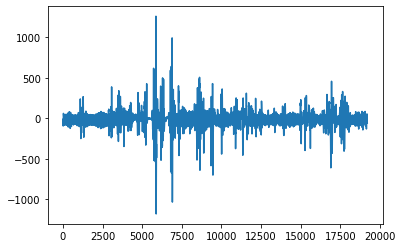

In [ ]:
#Data plot
import matplotlib.pyplot as plt
plt.plot(df1)

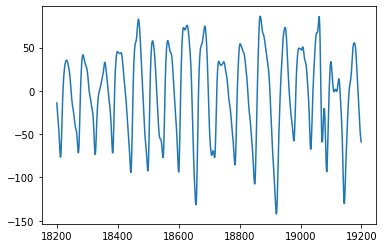

In [ ]:
plt.plot(df1.tail(1000))

In [ ]:
df2=df_s[start_df:end_df]

In [ ]:
print(df1)

0       -11.93
1       -14.31
2       -16.88
3       -20.14
4       -24.37
         ...  
19195   -44.22
19196   -49.04
19197   -52.88
19198   -56.01
19199   -58.96
Name: ppg, Length: 19200, dtype: float64


In [ ]:
print(scaler.inverse_transform(df2))

[[-11.93]
 [-14.31]
 [-16.88]
 ...
 [-52.88]
 [-56.01]
 [-58.96]]


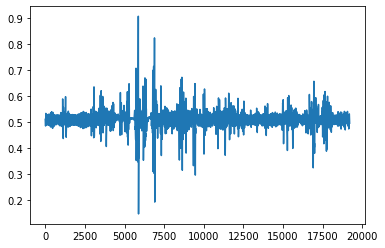

In [ ]:
plt.plot(df2)

In [ ]:
#splitting dataset into train and test split
#test_size: keeping minimum to have maximum training
training_size=int(len(df2)*0.99)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [ ]:
print(scaler.inverse_transform(df2))

[[-11.93]
 [-14.31]
 [-16.88]
 ...
 [-52.88]
 [-56.01]
 [-58.96]]


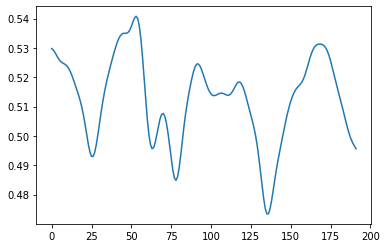

In [ ]:
plt.plot(test_data)

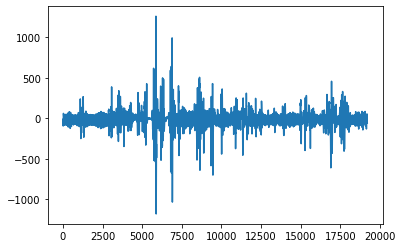

In [ ]:
plt.plot(scaler.inverse_transform(df2))

In [ ]:
print(scaler.inverse_transform(df2))

[[-11.93]
 [-14.31]
 [-16.88]
 ...
 [-52.88]
 [-56.01]
 [-58.96]]


In [ ]:
training_size,test_size

(19008, 192)

In [ ]:
#Function to convert code into matrices of feature_vectors suitable for LSTM
#Time Step = No of values it looks back at
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# Time Step = 10
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(18997, 10)
(18997,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(181, 10)
(181,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0] ,X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1 )

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [ ]:
#Single Layer LSTM model
# create and fit the LSTM network, optimizer=adam, 25 neurons, dropout 0.1
model = Sequential()
model.add(LSTM(25, input_shape=(time_step,1)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 25)                2700      
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense (Dense)               (None, 1)                 26        
                                                                 
Total params: 2,726
Trainable params: 2,726
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(scaler.inverse_transform(df2))

[[-11.93]
 [-14.31]
 [-16.88]
 ...
 [-52.88]
 [-56.01]
 [-58.96]]


In [ ]:
model.fit(X_train, y_train, epochs=200, batch_size=240, verbose=1)

Epoch 1/200
80/80 [==============================] - 3s 10ms/step - loss: 0.0291
Epoch 2/200
80/80 [==============================] - 1s 10ms/step - loss: 0.0034
Epoch 3/200
80/80 [==============================] - 1s 10ms/step - loss: 0.0029
Epoch 4/200
80/80 [==============================] - 1s 10ms/step - loss: 0.0026
Epoch 5/200
80/80 [==============================] - 1s 10ms/step - loss: 0.0023
Epoch 6/200
80/80 [==============================] - 1s 10ms/step - loss: 0.0021
Epoch 7/200
80/80 [==============================] - 1s 9ms/step - loss: 0.0019
Epoch 8/200
80/80 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 9/200
80/80 [==============================] - 1s 10ms/step - loss: 0.0016
Epoch 10/200
80/80 [==============================] - 1s 9ms/step - loss: 0.0016
Epoch 11/200
80/80 [==============================] - 1s 10ms/step - loss: 0.0015
Epoch 12/200
80/80 [==============================] - 1s 10ms/step - loss: 0.0014
Epoch 13/200
80/80 [========

In [ ]:
import tensorflow as tf

In [ ]:
# Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

6/6 [==============================] - 0s 3ms/step


In [ ]:
print(scaler.inverse_transform(df2))

[[-11.93]
 [-14.31]
 [-16.88]
 ...
 [-52.88]
 [-56.01]
 [-58.96]]


In [ ]:
#Converting predict values to original scale
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
#Converting Ytrain and Ytest into original scale
y_train=scaler.inverse_transform([y_train])
ytest=scaler.inverse_transform([ytest])

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train[0],train_predict[:,0]))

14.055085321335397

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest[0],test_predict[:,0]))

13.634420765558144

In [ ]:
#Taking last x values from testing set ( x = look_back)
x_input=test_data[test_size - time_step:].reshape(1,-1)
x_input.shape

(1, 10)

In [ ]:
print(x_input)

[[0.51065377 0.50848838 0.50627307 0.5040796  0.50202342 0.50021373
  0.49870982 0.49751168 0.49653507 0.49561462]]


In [ ]:
print(test_data[-1:])

[[0.49561462]]


In [ ]:
print(df_s[211199:211201])

[[0.49561462]
 [0.49458809]]


In [ ]:
print(scaler.inverse_transform(df2))
print(df1)

[[-11.93]
 [-14.31]
 [-16.88]
 ...
 [-52.88]
 [-56.01]
 [-58.96]]
0       -11.93
1       -14.31
2       -16.88
3       -20.14
4       -24.37
         ...  
19195   -44.22
19196   -49.04
19197   -52.88
19198   -56.01
19199   -58.96
Name: ppg, Length: 19200, dtype: float64


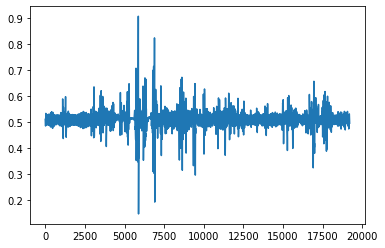

In [ ]:
plt.plot(df2)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
df_test2 = df_s[211200:211264]
print(len(df_test2))

64


In [ ]:
# demonstrate prediction for next 1 second = 64 values
from numpy import array

pred_time = 64
lst_output=[]
n_steps= time_step
i=0
while(i<pred_time):
    
    if(len(temp_input)>time_step):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        if(abs(df_test2[i]-yhat[0])<0.009):
          temp_input.extend(df_test2[i].tolist())
        else:
          temp_input.extend(yhat[0].tolist())
        # temp_input.extend(df_test2[i].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        if(abs(df_test2[0]-yhat[0])<0.009):
          temp_input.extend(df_test2[0].tolist())
        else:
          temp_input.extend(yhat[0].tolist())

        print(yhat[0])
        # print(df_test2[0])
        # temp_input.extend(df_test2[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.4993865]
11
1 day input [0.50848838 0.50627307 0.5040796  0.50202342 0.50021373 0.49870982
 0.49751168 0.49653507 0.49561462 0.49458809]
1 day output [[0.4982592]]
2 day input [0.50627307 0.5040796  0.50202342 0.50021373 0.49870982 0.49751168
 0.49653507 0.49561462 0.49458809 0.49329947]
2 day output [[0.49671787]]
3 day input [0.5040796  0.50202342 0.50021373 0.49870982 0.49751168 0.49653507
 0.49561462 0.49458809 0.49329947 0.49170507]
3 day output [[0.49481314]]
4 day input [0.50202342 0.50021373 0.49870982 0.49751168 0.49653507 0.49561462
 0.49458809 0.49329947 0.49170507 0.48993906]
4 day output [[0.492843]]
5 day input [0.50021373 0.49870982 0.49751168 0.49653507 0.49561462 0.49458809
 0.49329947 0.49170507 0.48993906 0.48833218]
5 day output [[0.49133673]]
6 day input [0.49870982 0.49751168 0.49653507 0.49561462 0.49458809 0.49329947
 0.49170507 0.48993906 0.48833218 0.48736494]
6 day output [[0.4909354]]
7 day input [0.49751168 0.49653507 0.49561462 0.49458809 0.49329947 0.4

In [ ]:
day_new=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,pred_time+time_step+1)

In [ ]:
import matplotlib.pyplot as plt
len(df2)

19200

In [ ]:
print(scaler.inverse_transform(df2))

[[-11.93]
 [-14.31]
 [-16.88]
 ...
 [-52.88]
 [-56.01]
 [-58.96]]


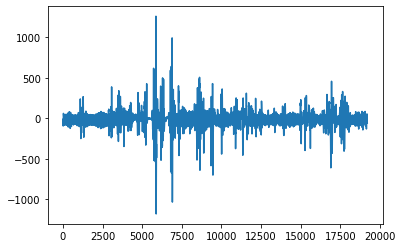

In [ ]:
plt.plot(scaler.inverse_transform(df2))

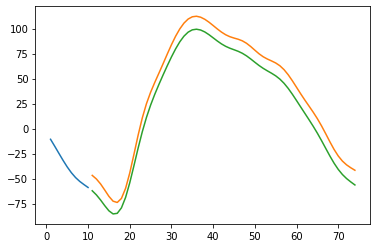

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df2[df_size - time_step:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.plot(day_pred,scaler.inverse_transform(df_test2))

In [ ]:
print(lst_output)

[[0.49776777625083923], [0.4966251254081726], [0.49506568908691406], [0.4931427240371704], [0.49115899205207825], [0.489652156829834], [0.48927050828933716], [0.4905722141265869], [0.49378037452697754], [0.49864092469215393], [0.5044906735420227], [0.5104657411575317], [0.5158526301383972], [0.5203073620796204], [0.5239095687866211], [0.5270073413848877], [0.5299614071846008], [0.5329550504684448], [0.5359892249107361], [0.5389237403869629], [0.5415858626365662], [0.5438504219055176], [0.5456480383872986], [0.5469067692756653], [0.5476019978523254], [0.5477638244628906], [0.5474561452865601], [0.5467920303344727], [0.5458824038505554], [0.5448331236839294], [0.5437557697296143], [0.5427607297897339], [0.5419326424598694], [0.5413202047348022], [0.5408934950828552], [0.5405168533325195], [0.5400111079216003], [0.5392414331436157], [0.5382137894630432], [0.5370540618896484], [0.5359362363815308], [0.5350050926208496], [0.5342984795570374], [0.5337105989456177], [0.5330694317817688], [0.5

In [ ]:
print(df_test2)

[[0.49458809]
 [0.49329947]
 [0.49170507]
 [0.48993906]
 [0.48833218]
 [0.48736494]
 [0.48754903]
 [0.48924327]
 [0.49251007]
 [0.49707798]
 [0.50240096]
 [0.50786747]
 [0.51297204]
 [0.5174557 ]
 [0.52131221]
 [0.52469446]
 [0.52778965]
 [0.53074756]
 [0.53361186]
 [0.53634511]
 [0.53886308]
 [0.54106279]
 [0.54282567]
 [0.54407998]
 [0.54479761]
 [0.54499418]
 [0.54474457]
 [0.54413926]
 [0.54328746]
 [0.54230773]
 [0.54131552]
 [0.54040755]
 [0.5396556 ]
 [0.53907213]
 [0.53859162]
 [0.53810176]
 [0.53748397]
 [0.53668521]
 [0.5357242 ]
 [0.53468519]
 [0.5336805 ]
 [0.53278814]
 [0.53200498]
 [0.5312655 ]
 [0.53044802]
 [0.52942773]
 [0.52812663]
 [0.52653223]
 [0.52470382]
 [0.522735  ]
 [0.52072874]
 [0.51873808]
 [0.51674431]
 [0.51470373]
 [0.51254146]
 [0.51023255]
 [0.50782379]
 [0.50543063]
 [0.50319972]
 [0.50125898]
 [0.4996677 ]
 [0.4983978 ]
 [0.49735879]
 [0.4964009 ]]


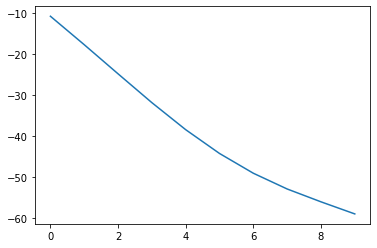

In [ ]:
plt.plot(scaler.inverse_transform(df2[df_size - time_step:]))

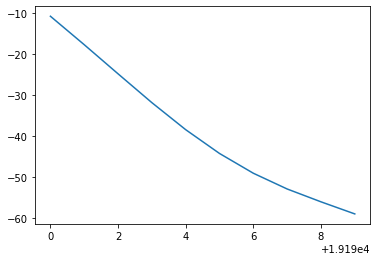

In [ ]:
plt.plot(df1[df_size - time_step:])

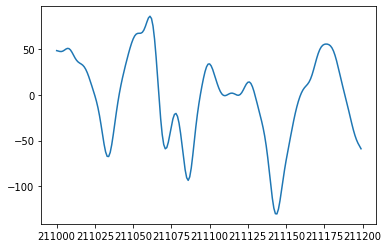

In [ ]:
plt.plot(df[end_df-200:end_df])